# 1. Fundamentals

## Why study Numerical Linear Algebra?

"Numerical linear algebra is a struggle for *quick* solutions and also *accurate* solutions." -- Strang

"The field of numerical linear algebra is more beautiful, and more fundamental, than its rather dull name suggests.  More beautiful, because it is full of powerful ideas that are quite unlike those normally emphasized in a linear algebra course in a mathematics department.  More fundamental, because, thanks to a trick of history, 'numerical' linear algebra is really *applied* linear algebra.  It is hear that one finds the essential ideas that every mathematical scientist needs to work effectively with vectors and matrices." -- Trefethen

There are two key types of matrix computation, which get combined in many different ways. These are:
- Matrix and tensor products
- Matrix decompositions

So basically we're going to be combining matrices, and pulling them apart again!

A list of the [Top 10 Algorithms](http://www.cs.fsu.edu/~lacher/courses/COT4401/notes/cise_v2_i1/index.html) of science and engineering during the 20th century includes: the **matrix decompositions** approach to linear algebra. It also includes the QR algorithm, which we'll cover, and Krylov iterative methods which we'll see an example of. (See here for [another take](https://nickhigham.wordpress.com/2016/03/29/the-top-10-algorithms-in-applied-mathematics/))

<img src="images/top10.png" alt="" style="width: 50%"/>
(source: [Top 10 Algorithms](http://www.cs.fsu.edu/~lacher/courses/COT4401/notes/cise_v2_i1/guest.pdf))

**Key Question of this course**: How can we do matrix computations with acceptable speed and acceptable accuracy?

### Motivation

Knowing what options there are, and how to navigate these compromises, can make enormous differences to your solutions. For instance, an approximate matrix computation can often be thousands of times faster than an exact one.

It's not just about knowing the contents of existing libraries, but knowing how they work too. That's because often you can make variations to an algorithm that aren't supported by your library, giving you the performance or accuracy that you need. In addition, this field is moving very quickly at the moment, particularly in areas related to deep learning, recommendation systems, and graph analytics, so you'll often find there's recent results that could make big differences in your project, but aren't in your library. This is particularly true of the use of approximate algorithms, based on random matrices.

Knowing how the algorithms really work also helps to both debug and accelerate your solution. 

## Floating Point Arithmetic

### Exercise

Take a moment to look at the function $f$ below.  Before you try running it, write on paper what the output would be of $x_1 = f(\frac{1}{10})$.  Now, (still on paper) plug that back into $f$ and calculate $x_2 = f(x_1)$.  Keep going for 10 iterations.

You should soon notice a cyclical pattern.

This example is taken from page 107 of *Numerical Methods*, by Greenbaum and Chartier.

In [1]:
def f(x):
    if x <= 1/2:
        return 2 * x
    if x > 1/2:
        return 2*x - 1

Only after you've written down what you think the answer should be, run the code below:

In [ ]:
x = 1/10
for i in range(80):
    print(x)
    x = f(x)

What went wrong?

### Problem: math is continuous & infinite, but computers are discrete & finite

Two Limitations of computer representations of numbers:
1. they can't be arbitrarily large or small
2. there must be gaps between them

How computers store numbers:

<img src="images/fpa.png" alt="floating point" style="width: 60%"/>

IEEE Double precision arithmetic:
- Numbers can be as large as $1.79 x 10^{308}$ and as small as $2.23 \times 10^{-308}$.
- The interval $[1,2]$ is represented by discrete subset: 
$$1, \: 1+2^{-52}, \: 1+2 \times 2^{-52},\: 1+3 \times 2^{-52},\: \ldots, 2$$

- The interval $[2,4]$ is represented:
$$1, \: 2+2^{-51}, \: 2+2 \times 2^{-51},\: 2+3 \times 2^{-51},\: \ldots, 4$$


**Machine Epsilon**

Half the distance between 1 and the next larger number. This can vary by computer.  IEEE standards for double precision specify $$ \varepsilon_{machine} = 2^{-53} \approx 1.11 \times 10^{-16}$$

**Two important properties of Floating Point Arithmetic**:

- The difference between a real number $x$ and its closest floating point approximation $fl(x)$ is always smaller than $\varepsilon_{machine}$ in relative terms.  For some $\varepsilon$, where $\lvert \varepsilon \rvert \leq \varepsilon_{machine}$, $$fl(x)=x \cdot (1 + \varepsilon)$$

- Where * is any operation ($+, -, \times, \div$), and $\circledast$ is its floating point analogue,
    $$ x \circledast y = (x * y)(1 + \varepsilon)$$
for some $\varepsilon$, where $\lvert \varepsilon \rvert \leq \varepsilon_{machine}$
That is, every operation of floating point arithmetic is exact up to a relative error of size at most $\varepsilon_{machine}$

### History

Floating point arithmetic may seem like a clear choice in hindsight, but there have been many, many ways of storing numbers:
- fixed-point arithmetic
- logarithmic and semilogarithmic number systems
- continued-fractions
- rational numbers
- possibly infinite strings of rational numbers
- level-index number systems
- fixed-slash and floating-slash number systems
- 2-adic numbers

For references, see [Chapter 1](https://perso.ens-lyon.fr/jean-michel.muller/chapitre1.pdf) (which is free) of the [Handbook of Floating-Point Arithmetic](http://www.springer.com/gp/book/9780817647049).  Yes, there is an entire 16 chapter book on floating point!

Timeline History of Floating Point Arithmetic:
- ~8000 BC: Babylonian radix-60 system was earliest floating-point system (Donald Knuth).  Represented the significand of a radix-60 floating-point representation (if ratio of two numbers is a power of 60, represented the same)
- 1630 Slide rule.  Manipulate only significands (radix-10)
- 1914 Leonardo Torres y Quevedo described an electromechanical implementation of Babbage's Analytical Engine with Floating Point Arithmetic.
- 1941 First real, modern implementation.  Konrad Zuse's Z3 computer.  Used radix-2, with 14 bit significand, 7 bit exponents, and 1 sign bit.
- 1985 IEEE 754-1985 Standard for Binary Floating-Point Arithmetic released.  Has increased accuracy, reliability, and portability.  [William Kahan](https://people.eecs.berkeley.edu/~wkahan/) played leading role.

"Many different ways of approximating real numbers on computers have been introduced.. And yet, floating-point arithmetic is **by far the most widely used** way of representing real numbers in modern computers. Simulating an infinite, continuous set (the real numbers) with a finite set (the “machine numbers”) is not a straightforward task: **clever compromises must be found between, speed, accuracy, dynamic range, ease of use and implementation, and memory**. It appears that floating-point arithmetic, with adequately chosen parameters (radix, precision, extremal exponents, etc.), is a very good compromise for most numerical applications."

Although a radix value of 2 (binary) seems like the pretty clear winner now for computers, a variety of other radix values have been used at various point:

- radix-8 used by early machines PDP-10, Burroughs 570 and 6700
- radix-16 IBM 360
- radix-10 financial calculations, pocket calculators, Maple
- radix-3 Russian SETUN computer (1958).  Benefits: minimizes beta x p (symbols x digits), for a fixed largest representable number beta^p - 1.  Rounding = truncation
- radix-2 most common.  Reasons: easy to implement.  Studies have shown (with implicit leading bit) this gives better worst-case or average accuracy than all other radices.

### Expensive Errors

*The below examples are from Greenbaum & Chartier.*

European Space Agency spent 10 years and $7 billion on the Ariane 5 Rocket.

What can happen when you try to fit a 64 bit number into a 16 bit space (integer overflow):

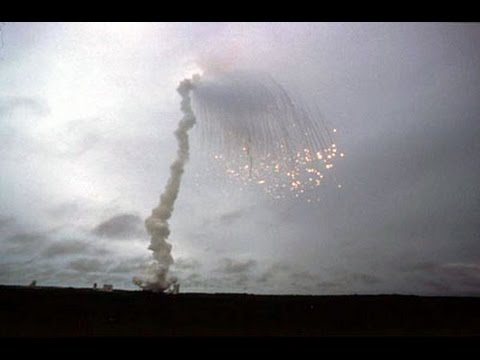

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo("PK_yguLapgA")

Here is a floating point error that cost Intel $475 million:

[1994 NYTimes article about Intel Pentium Error](http://www.nytimes.com/1994/11/24/business/company-news-flaw-undermines-accuracy-of-pentium-chips.html)
![article](images/pentium_nytimes.png)

**Resources**: See Lecture 13 of Trefethen & Bau and Chapter 5 of Greenbaum & Chartier for more on Floating Point Arithmetic

## Conditioning and Stability

Since we can not represent numbers exactly on a computer (due to the finiteness of our storage, and the gaps between numbers in floating point architecture), it becomes important to know *how small perturbations in the input to a problem impact the output*.

"The notion of stability is the standard way of characterizing what is possible [with a computer]-- numerical analyst's idea of what it means to get the 'right answer', even if it is not exact." - Trefethen, page 102

**Conditioning**: perturbation behavior of a mathematical problem (e.g. least squares)

**Stability**: perturbation behavior of an algorithm used to solve that problem on a computer (e.g. least squares algorithms, householder, back substitution, gaussian elimination)

**"A stable algorithm gives nearly the right answer to nearly the right question."**

Example: Eigenvalues of a Matrix

In [10]:
import scipy.linalg as la 

A = [[1, 1000], [0, 1]]
B = [[1, 1000], [0.001, 1]]

wA, vrA = la.eig(A)
wB, vrB = la.eig(B)

wA, wB

(array([ 1.+0.j,  1.+0.j]), array([ 2.+0.j,  0.+0.j]))

**Reminder: Two properties of Floating Point Arithmetic**

- The difference between a real number $x$ and its closest floating point approximation $fl(x)$ is always smaller than $\varepsilon_{machine}$ in relative terms.

- Every operation $+, -, \times, \div$ of floating point arithmetic is exact up to a relative error of size at most $\varepsilon_{machine}$ 

Examples we'll see:
- Classical vs Modified Gram-Schmidt accuracy
- Gram-Schmidt vs. Householder (2 different ways of computing QR factorization), how orthogonal the answer is
- Problem of computing eigenvalues of a nonsymmetric matrix
- Condition of a system of equations

## Memory/Locality

Here are some *numbers everyone should know* (from the legendary [Jeff Dean](http://static.googleusercontent.com/media/research.google.com/en/us/people/jeff/stanford-295-talk.pdf)):
- L1 cache reference 0.5 ns
- L2 cache reference 7 ns
- Main memory reference 100 ns
- Send 2K bytes over 1 Gbps network 20,000 ns
- Read 1 MB sequentially from memory 250,000 ns
- Round trip within same datacenter 500,000 ns
- Disk seek 10,000,000 ns
- Read 1 MB sequentially from network 10,000,000 ns
- Read 1 MB sequentially from disk 30,000,000 ns
- Send packet CA->Netherlands->CA 150,000,000 ns

And here is an updated, interactive [version](https://people.eecs.berkeley.edu/~rcs/research/interactive_latency.html), which includes a timeline of how these numbers have changed.

**Key take-away**: Each successive memory type is (at least) an order of magnitude worse than the one before it.  Disk seeks are **very slow**.

You should also check out this Prezi on [How Fast Does a Business Computer Need to Be?](https://prezi.com/j_ennbpapywo/how-fast-does-a-business-computer-need-to-be/).  Key message:  the speed of solid state drives are worth the cost.

## Parallelization and Vectorization

ADD STUFF

## Matrix Computation Packages: BLAS and LAPACK 

#### History

[BLAS (Basic Linear Algebra Subprograms)](http://www.netlib.org/blas/): specification for low-level matrix and vector arithmetic operations. These are the standard building blocks for performing basic vector and matrix operations.  BLAS originated as a Fortran library in 1979.  Examples of BLAS libraries include: AMD Core Math Library (ACML), ATLAS, Intel Math Kernel Library (MKL), and OpenBLAS.

1970s and 1980s: EISPACK (eigenvalue routines) and LINPACK (linear equations and linear least-squares routines) libraries

**LAPACK original goal**: make LINAPCK and EISPACK run efficiently on shared-memory vector and parallel processors and exploit cache on modern cache-based architectures.  EISPACK and LINPACK ignore multi-layered memory hierarchies and spend too much time moving data around.

#### LAPACK
[LAPACK](http://www.netlib.org/lapack/) is written in Fortran, provides routines for solving systems of linear equations, eigenvalue problems, and singular value problems.  Matrix factorizations (LU, Cholesky, QR, SVD, Schur).  Dense and banded matrices are handled, but not general sparse matrices.  Real and complex, single and double precision.

LAPACK uses highly optimized block operations implementations (which much be implemented on each machine) LAPACK written so as much of the computation as possible is performed by BLAS.